## Predicting nestle stock price

Basic way to deal with problem statement is to first analyze the dataset and then use it for prediction.
Following steps will be followed for predicting nestle stock price:
1. Load the dataset
2. Clean the dataset
3. Understand the basic metrics based on data in dataset
4. Analyze and identify features that affect the nestle stock based on visualizations, etc.
5. Find out if any outliers and remove/modify data to remove outliers
6. Modify/Add new columns if required before prediction
7. Split the data into test and training data using split (20% for testing and 80% for training)
8. Find out accuracy of the dataset using score, MSE, RMSE


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Load the dataset

In [5]:
df = pd.read_csv('/Users/nishankarora/learning/machine-learning/practice/datasets-for-practice/nestle.csv')
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-April-2022,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,20-April-2022,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,19-April-2022,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18-April-2022,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,13-April-2022,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,6-January-2012,4114.00,4160.00,4076.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25
2549,5-January-2012,4118.00,4126.90,4080.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15
2550,4-January-2012,4100.00,4125.00,4081.40,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60
2551,3-January-2012,4061.00,4110.10,4060.10,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35


In [7]:
df_new = df.drop(columns=["Date"])
df_new

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30
...,...,...,...,...,...,...,...,...,...,...,...,...
2548,4114.00,4160.00,4076.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25
2549,4118.00,4126.90,4080.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15
2550,4100.00,4125.00,4081.40,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60
2551,4061.00,4110.10,4060.10,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35


In [8]:
df.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         2
% Deli. Qty to Traded Qty    2
Spread High-Low              0
Spread Close-Open            0
dtype: int64

### 2. Data Cleaning
#### Since some records are found with null values, those records can be removed to avoid them affecting the prediction.

In [9]:
df_new.drop_duplicates()
df_new

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30
...,...,...,...,...,...,...,...,...,...,...,...,...
2548,4114.00,4160.00,4076.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25
2549,4118.00,4126.90,4080.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15
2550,4100.00,4125.00,4081.40,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60
2551,4061.00,4110.10,4060.10,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35


In [15]:
df_new.dropna(inplace=True)
df_new

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30
...,...,...,...,...,...,...,...,...,...,...,...,...
2548,4114.00,4160.00,4076.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25
2549,4118.00,4126.90,4080.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15
2550,4100.00,4125.00,4081.40,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60
2551,4061.00,4110.10,4060.10,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35


In [13]:
df.dropna(inplace=True)
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-April-2022,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,20-April-2022,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,19-April-2022,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18-April-2022,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,13-April-2022,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,6-January-2012,4114.00,4160.00,4076.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25
2549,5-January-2012,4118.00,4126.90,4080.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15
2550,4-January-2012,4100.00,4125.00,4081.40,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60
2551,3-January-2012,4061.00,4110.10,4060.10,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35


### 3. Understand basic metrics of data
#### Basic metrics include standard deviation, count, mean, min, max, etc

In [17]:
df_new.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000,2.551000e+03,2551.000000,2551.000000,2551.000000,2551.000000
mean,9335.655684,9427.351039,9224.573403,9322.587279,9325.203667,5522.303018,1004.203842,4.762314e+07,3264.052528,49.024461,202.777636,-13.068405
std,4939.519226,4985.801142,4878.036837,4931.789757,4928.474440,10420.816889,1137.987345,8.506207e+07,8652.860793,19.119739,174.995455,157.898334
min,3970.000000,3995.000000,3930.000000,3942.450000,3936.768632,39.000000,6.000000,1.721420e+05,33.000000,1.270000,17.000000,-1381.300000
25%,5390.500000,5444.625000,5322.575000,5381.975000,5384.453479,1570.000000,442.000000,1.171583e+07,653.500000,35.575000,88.825000,-71.600000
50%,6804.000000,6866.000000,6746.000000,6809.100000,6811.956570,2618.000000,731.000000,2.219470e+07,1123.000000,46.870000,152.100000,-12.750000
75%,13254.975000,13655.475000,12815.000000,13443.100000,13328.448479,4977.000000,1200.500000,4.940228e+07,2225.500000,59.130000,263.050000,48.275000
max,20452.000000,20599.950000,20243.800000,20439.450000,20417.372402,154684.000000,20964.000000,2.155655e+09,152993.000000,98.930000,1950.000000,1523.300000


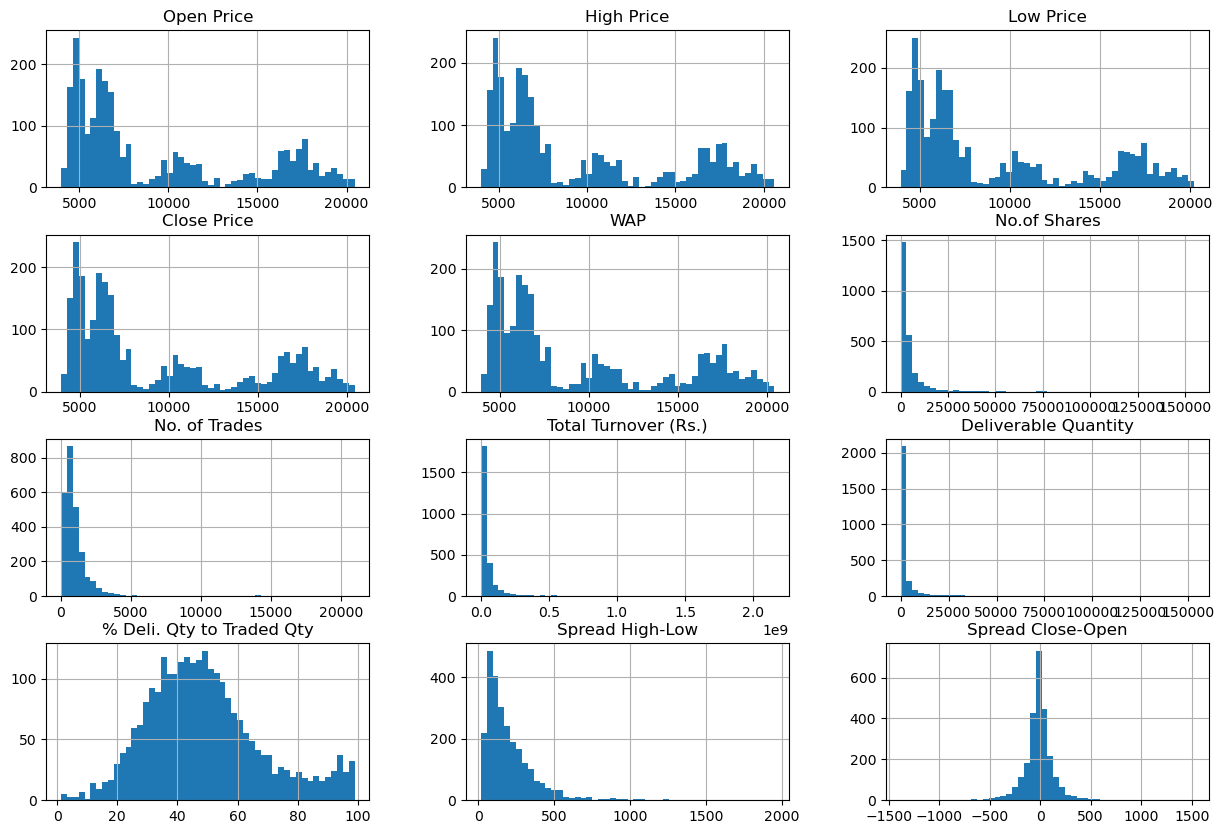

In [18]:
df_new.corr()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Open Price,1.000000,0.999722,0.999701,0.999490,0.999693,-0.075962,0.155751,0.191649,-0.093000,-0.246738,0.616225,-0.064897
High Price,0.999722,1.000000,0.999609,0.999792,0.999879,-0.073567,0.162322,0.194633,-0.092403,-0.248603,0.626706,-0.046728
Low Price,0.999701,0.999609,1.000000,0.999761,0.999858,-0.078022,0.150371,0.189099,-0.093886,-0.245208,0.604677,-0.047049
Close Price,0.999490,0.999792,0.999761,1.000000,0.999927,-0.075592,0.156976,0.191918,-0.093174,-0.246861,0.616556,-0.032982
WAP,0.999693,0.999879,0.999858,0.999927,1.000000,-0.075449,0.156842,0.192142,-0.093045,-0.247219,0.616313,-0.041648
No.of Shares,-0.075962,-0.073567,-0.078022,-0.075592,-0.075449,1.000000,0.452115,0.856362,0.868194,0.279279,0.078866,0.015272
No. of Trades,0.155751,0.162322,0.150371,0.156976,0.156842,0.452115,1.000000,0.464949,0.103851,-0.188500,0.433091,0.030637
Total Turnover (Rs.),0.191649,0.194633,0.189099,0.191918,0.192142,0.856362,0.464949,1.000000,0.655851,0.192031,0.274107,-0.000977
Deliverable Quantity,-0.093000,-0.092403,-0.093886,-0.093174,-0.093045,0.868194,0.103851,0.655851,1.000000,0.488715,-0.015550,-0.000877
% Deli. Qty to Traded Qty,-0.246738,-0.248603,-0.245208,-0.246861,-0.247219,0.279279,-0.188500,0.192031,0.488715,1.000000,-0.247729,0.008249


### 4. Feature Selection

<Axes: >

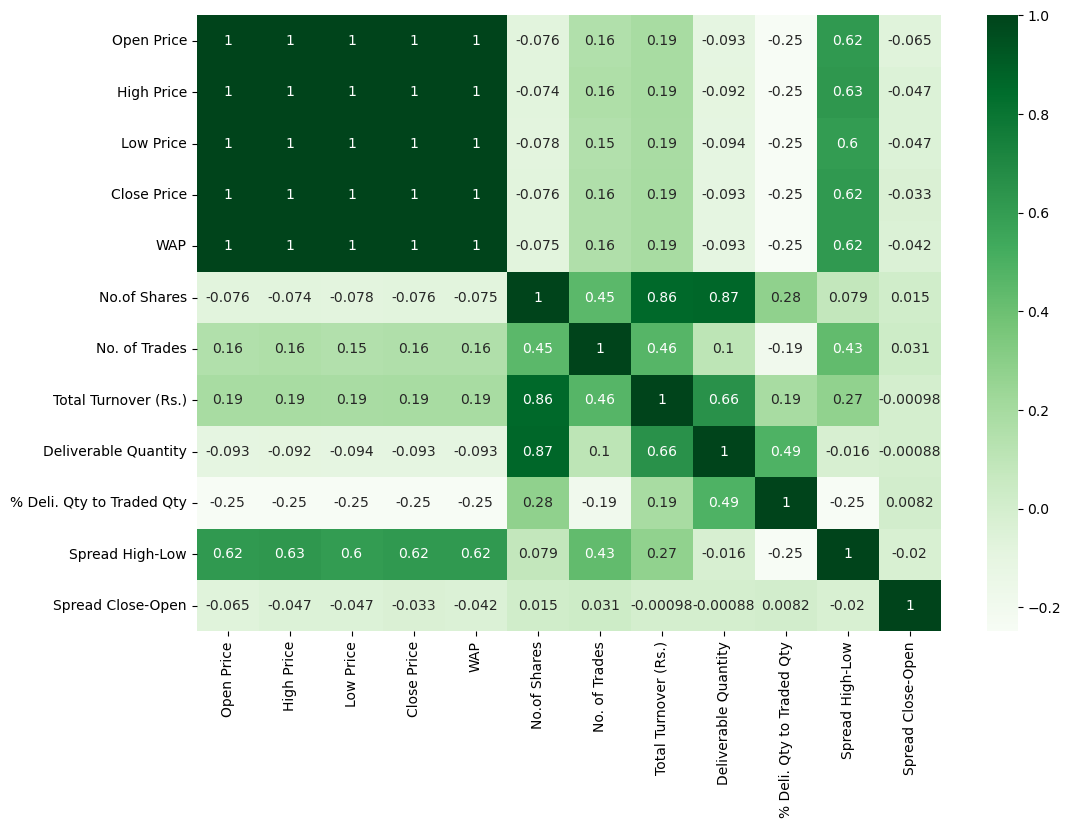

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df_new.corr(),annot=True,linecolor='blue',cmap='Greens')

##### Since the correlation numbers show Open Price, Close Price, High Price, Low Price, WAP, No of shares, No of trades, Total Turnover, Deliverable Quantity,  % Deli. Qty to Traded Qty, Spread High-Low and Spread Close-Open are correlated given that Open Price, Close Price, High Price, Low Price, WAP, Spread High-Low have high correlation with Close Price, these features can be selected for prediction

<Figure size 1200x1200 with 0 Axes>

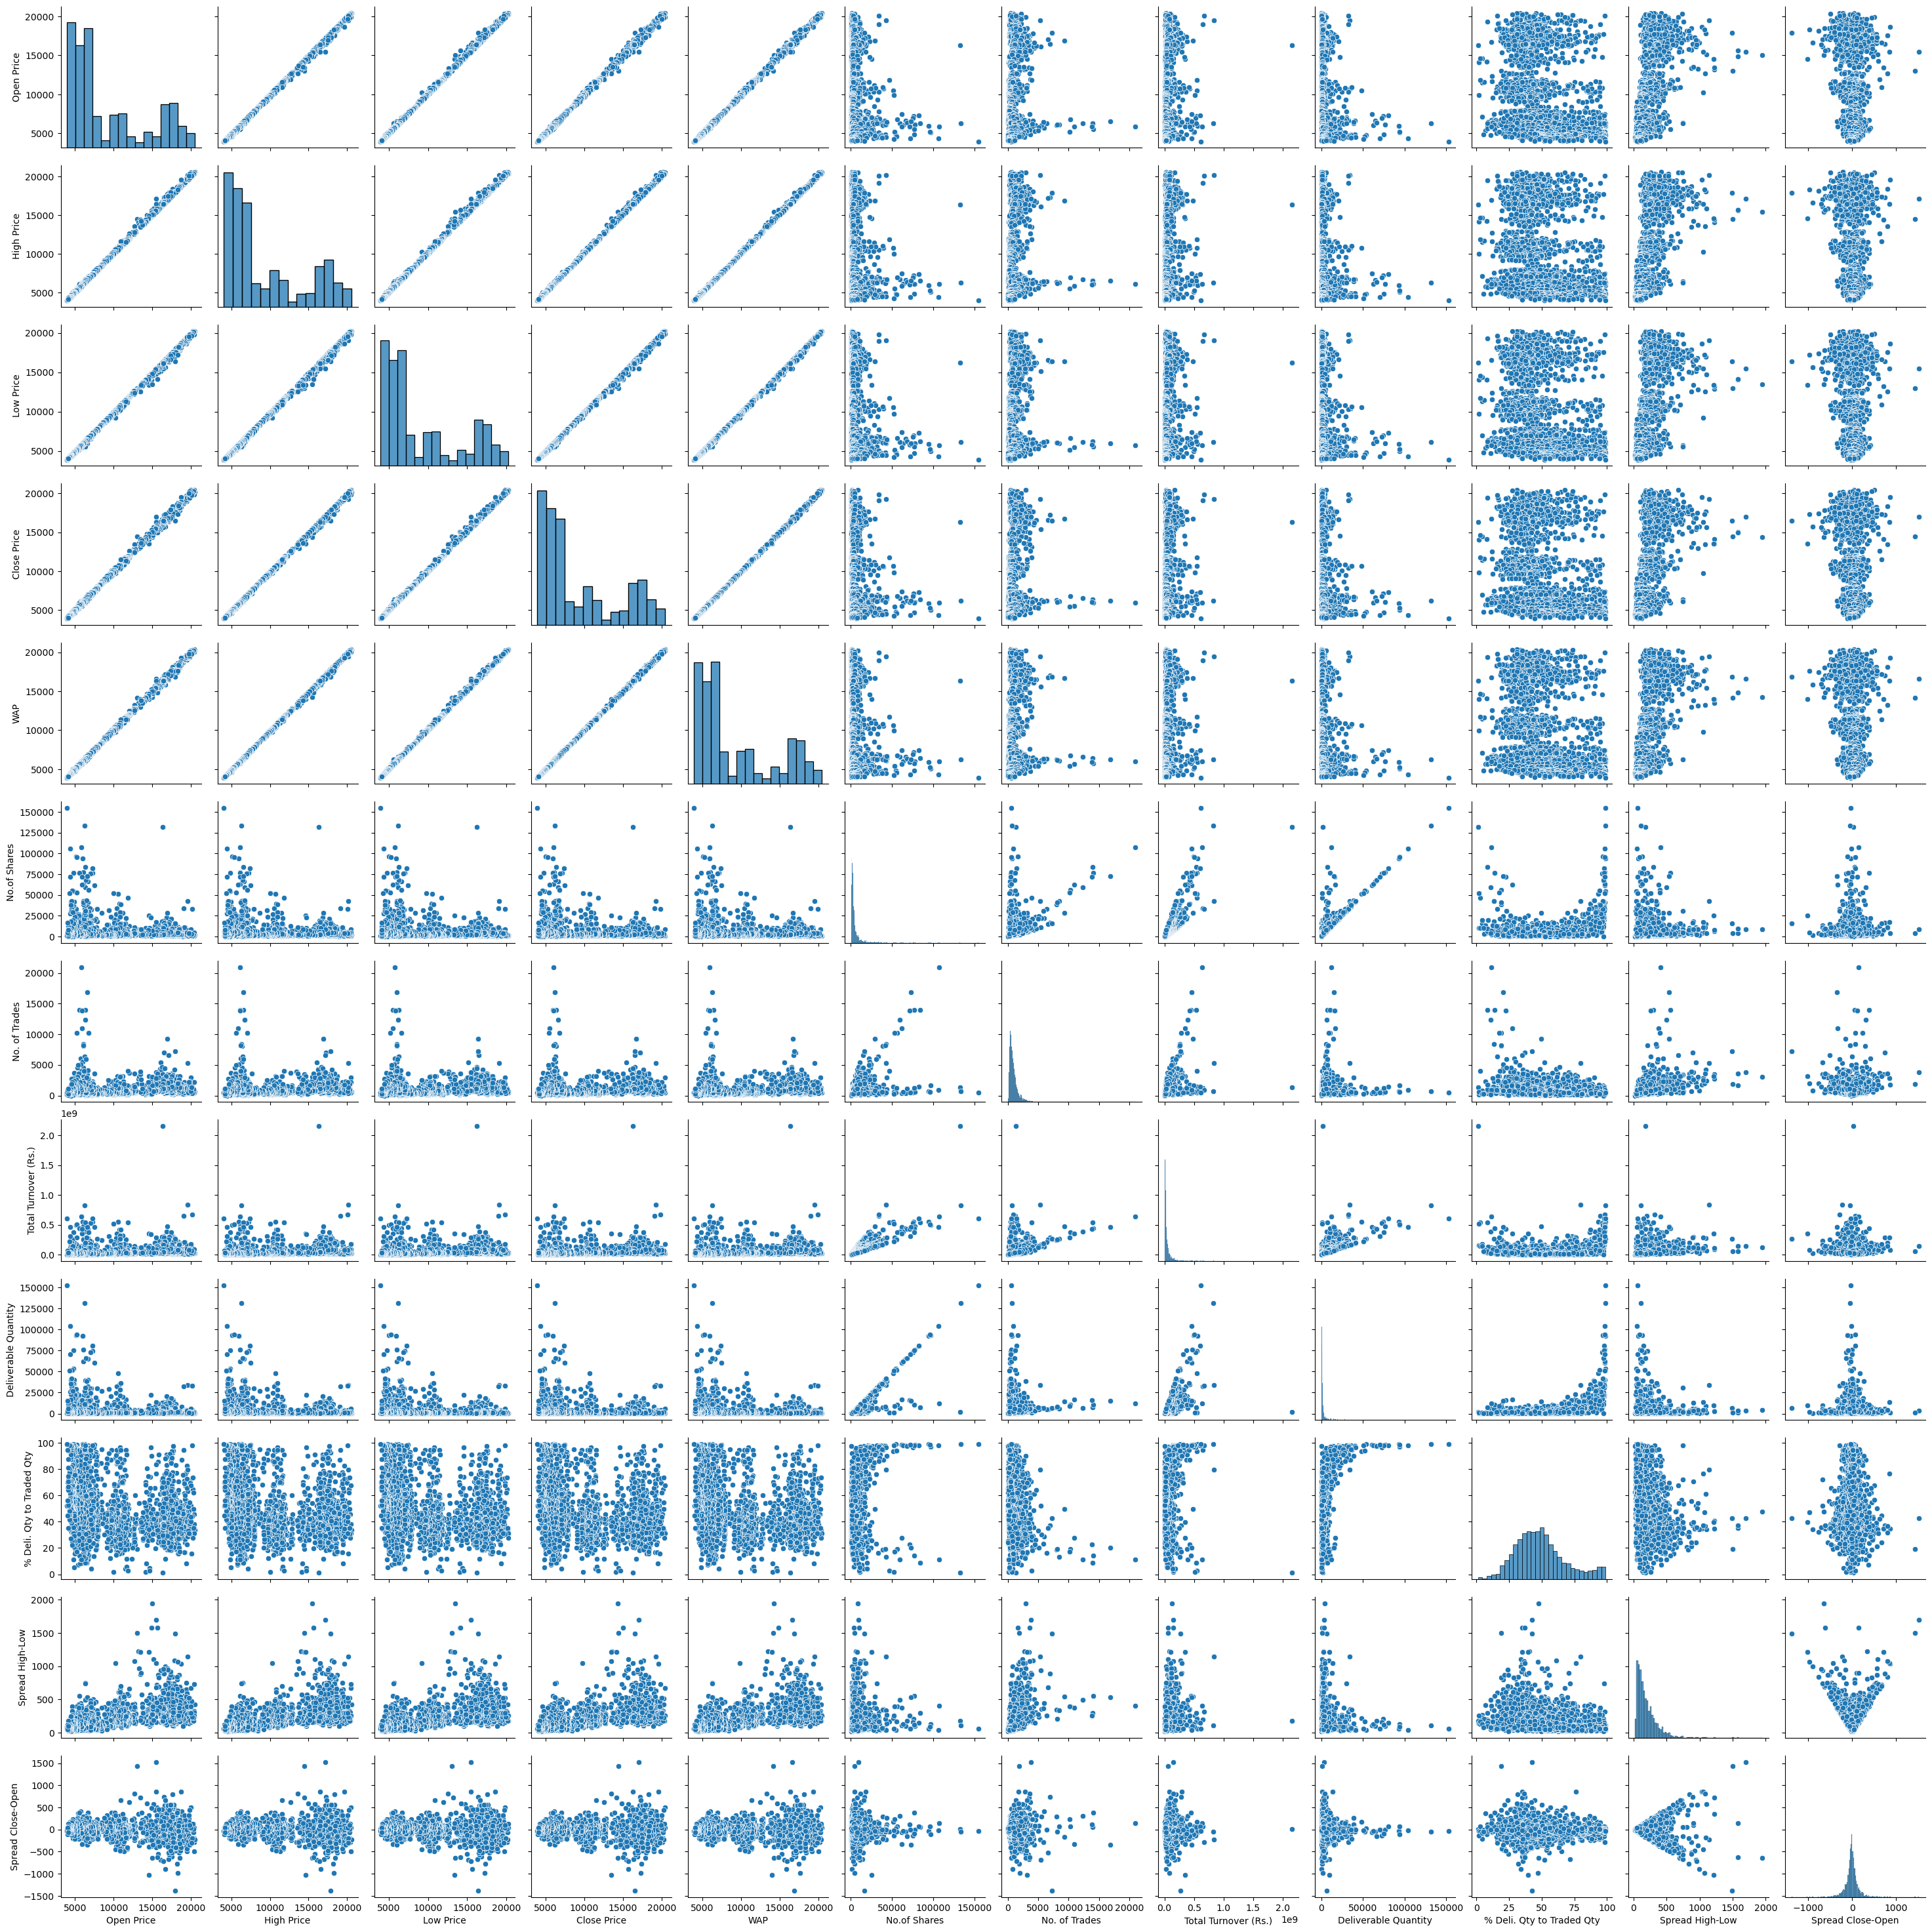

In [29]:
plt.figure(figsize=(12,12))
sns.pairplot(df_new)

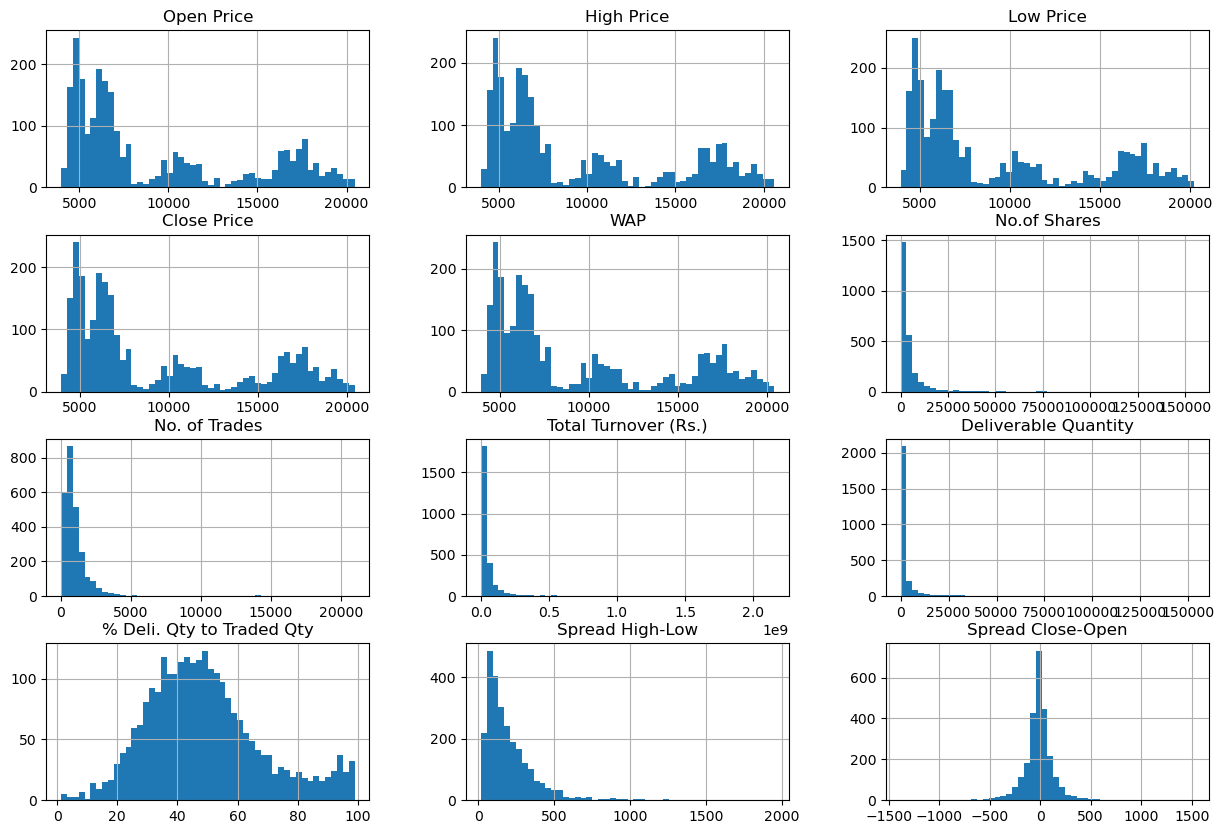

In [32]:
df_new.hist(bins=50,figsize=(15,10));

##### Visualizations above also validate our hypothesis of high correlated columns. Additionally spread of data is also similar

### 5. Find out if features selected have outliers 

<Axes: xlabel='Open Price'>

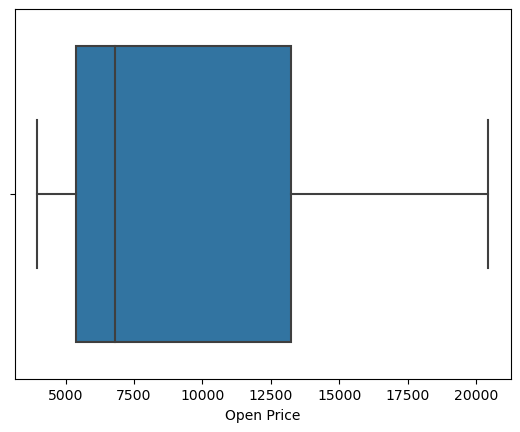

In [36]:
sns.boxplot(data=df_new,x="Open Price")

<Axes: xlabel='High Price'>

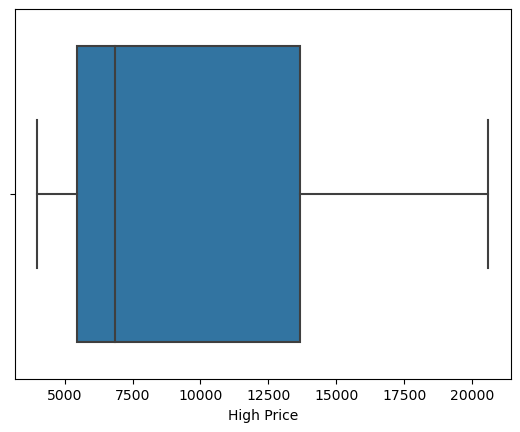

In [37]:
sns.boxplot(data=df_new,x="High Price")

<Axes: xlabel='Low Price'>

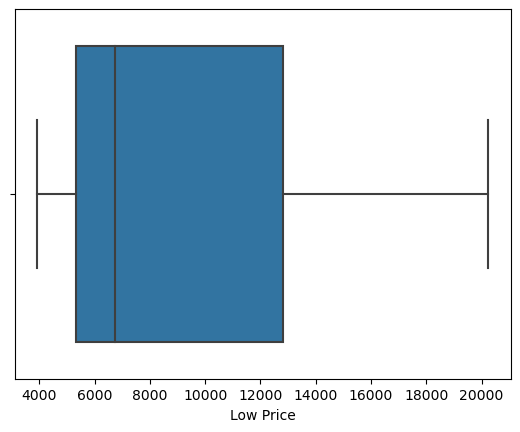

In [38]:
sns.boxplot(data=df_new,x="Low Price")

<Axes: xlabel='Close Price'>

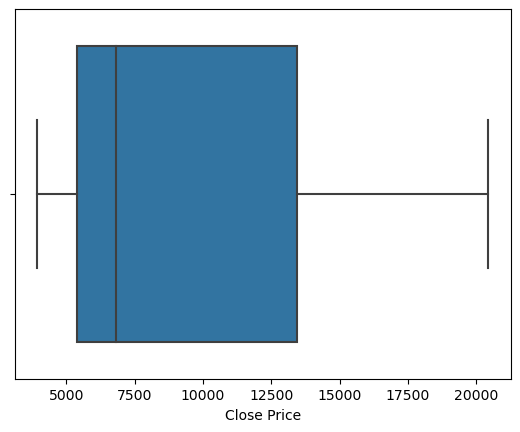

In [39]:
sns.boxplot(data=df_new,x="Close Price")

<Axes: xlabel='WAP'>

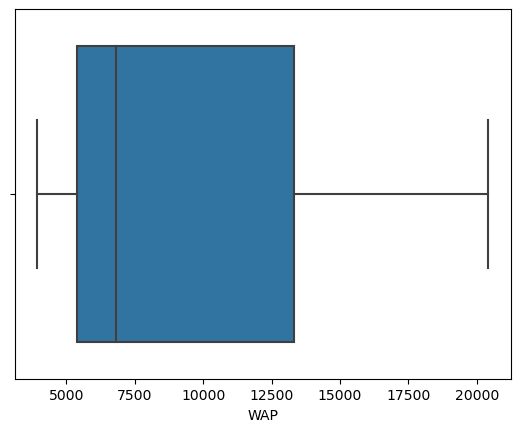

In [40]:
sns.boxplot(data=df_new,x="WAP")

<Axes: xlabel='Spread High-Low'>

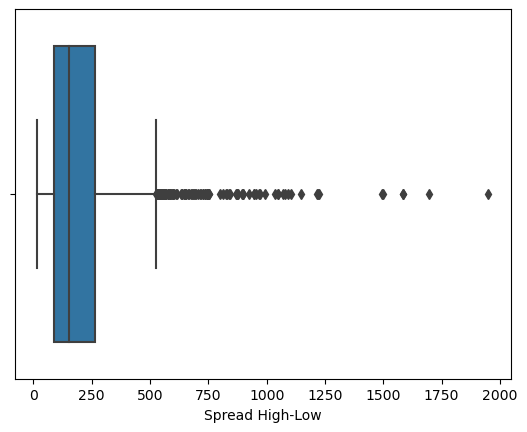

In [45]:
sns.boxplot(data=df_new,x="Spread High-Low")

Above seems to be having outliers but we can ignore this column anyways 

### 6. Feature Extraction

In [53]:
df_new['Date'] = pd.to_datetime(df['Date'])

In [54]:
df_new['Day']=df_new['Date'].dt.weekday
df_new['Month']=df_new['Date'].dt.month
df_new['Year']=df_new['Date'].dt.year

In [55]:
df_new.drop(columns=["Date"], inplace=True)
df_new

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Day,Month,Year
0,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80,3,4,2022
1,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60,2,4,2022
2,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90,1,4,2022
3,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35,0,4,2022
4,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30,2,4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,4114.00,4160.00,4076.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25,4,1,2012
2549,4118.00,4126.90,4080.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15,3,1,2012
2550,4100.00,4125.00,4081.40,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60,2,1,2012
2551,4061.00,4110.10,4060.10,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35,1,1,2012


### Insights

In [79]:
df_new['Day'].value_counts()

1    513
2    512
3    508
0    508
4    498
5      9
6      3
Name: Day, dtype: int64

In [80]:
yw=df_new.groupby('Year')['No. of Trades'].sum()
yw

Year
2012    128129
2013    181198
2014    227595
2015    464161
2016    228811
2017    143184
2018    177668
2019    193401
2020    457517
2021    296816
2022     63244
Name: No. of Trades, dtype: int64

Text(0.5, 1.0, 'no. of trades')

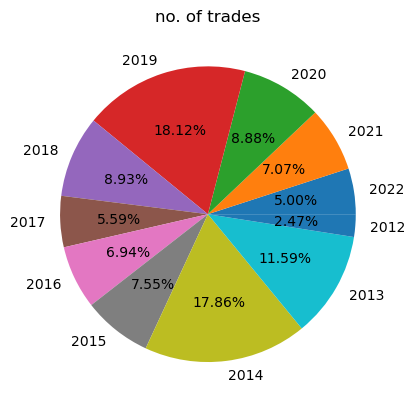

In [81]:
plt.pie(yw,labels=df_new['Year'].unique(),autopct='%1.2f%%');
plt.title('no. of trades')

In [82]:
dw = df_new.groupby('Day')['No. of Trades'].sum().reset_index()
dw.head(10)

,Day,No. of Trades
0,0,483357
1,1,490994
2,2,536991
3,3,518981
4,4,528457
5,5,2011
6,6,933


Text(0.5, 1.0, 'Trades based on days')

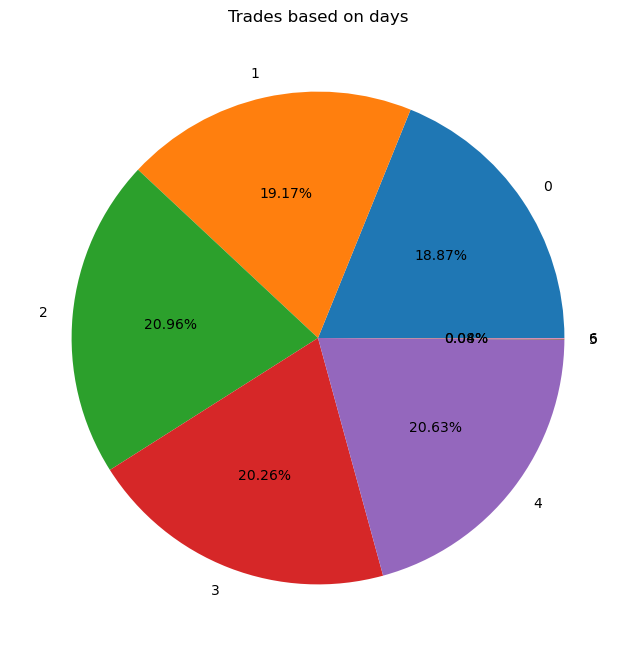

In [84]:
plt.figure(figsize=(10,8))
plt.pie(dw['No. of Trades'],labels= dw['Day'],autopct='%1.2f%%');
plt.title("Trades based on days")

In [86]:
dw = df_new.groupby('Day')['High Price'].sum().reset_index()
dw.head(10)

,Day,High Price
0,0,4783685.00
1,1,4842013.20
2,2,4840973.55
3,3,4816116.55
4,4,4671316.70
5,5,67300.55
6,6,27766.95


Text(0.5, 1.0, 'High Price based on days')

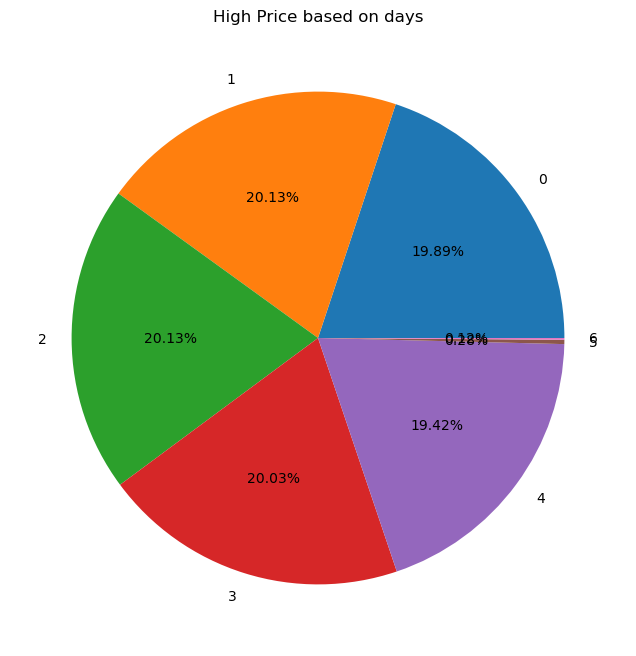

In [88]:
plt.figure(figsize=(10,8))
plt.pie(dw['High Price'],labels= dw['Day'],autopct='%1.2f%%');
plt.title("High Price based on days")

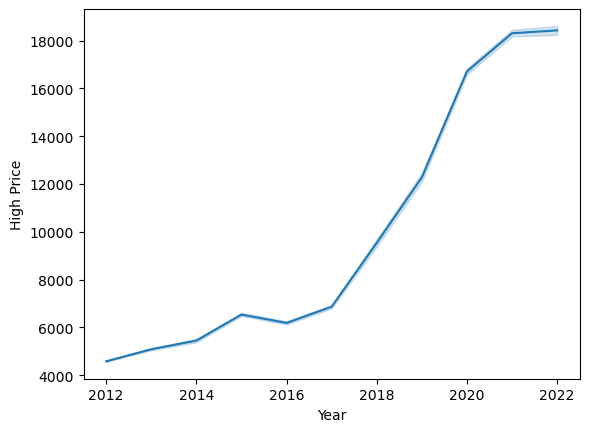

In [89]:
sns.lineplot(data=df_new, x="Year", y="High Price");

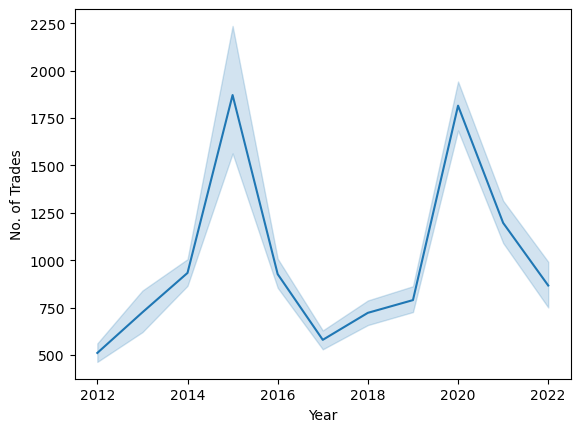

In [90]:
sns.lineplot(data=df_new, x="Year", y="No. of Trades");

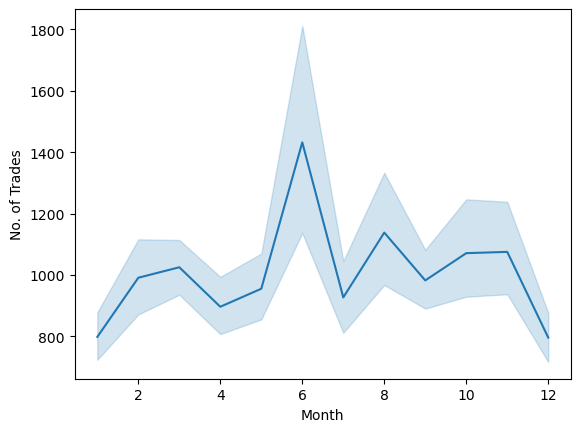

In [91]:
sns.lineplot(data=df_new,x='Month',y='No. of Trades');

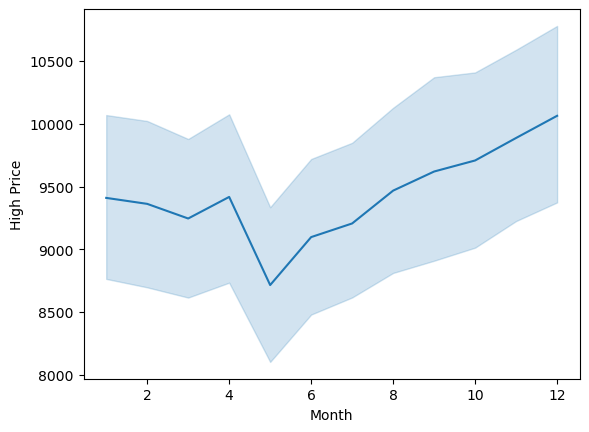

In [92]:
sns.lineplot(data=df_new,x='Month',y='High Price');

### OBSERVATIONS

- From 2012 to 2022 Max. number of trades were in the years 2018 (18%) , 2014(17%) and 2013(11%) and lowest were in years 2012(2.5%) , 2017(5.6%) and 2016(6.9%)
- Wednesday , Friday and Thursday are the days when maximum number of trades takes place.
- Usually the stock is at high price on Wednesday , Tuesday and Thursdays.
- In 2012, the stock price was at its low, the line elevated at 2015 when the price started rising and from then the line went on elevating till 2021 till April 2022 , It is somewhat constant and changes within the 18000 Range.
- The line has formed a peak at the 6th month in the graph , which means that MAx no of trades happens in the month of June.

### 7. Split the data into training and test data

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_df = pd.DataFrame()
x_df["Open Price"] = df_new["Open Price"]
x_df["Low Price"] = df_new["Low Price"]
x_df["High Price"] = df_new["High Price"]
x_df["WAP"] = df_new["WAP"]
x_df["Spread High-Low"] = df_new["Spread High-Low"]
x_df

,Open Price,Low Price,High Price,WAP,Spread High-Low
0,18150.00,17772.90,18572.95,18130.183442,800.05
1,18100.10,18017.15,18415.00,18295.559071,397.85
2,18470.05,17845.60,18718.00,18355.093320,872.40
3,18294.50,18294.50,18684.50,18511.224599,390.00
4,18371.20,18248.25,18549.30,18388.967826,301.05
...,...,...,...,...,...
2548,4114.00,4076.00,4160.00,4129.486321,84.00
2549,4118.00,4080.00,4126.90,4106.848723,46.90
2550,4100.00,4081.40,4125.00,4105.106055,43.60
2551,4061.00,4060.10,4110.10,4091.474315,50.00


In [63]:
y_df = df_new["Close Price"]
y_df

0       18205.80
1       18313.70
2       17943.15
3       18549.85
4       18343.90
          ...   
2548     4143.25
2549     4101.85
2550     4120.60
2551     4095.35
2552     4070.35
Name: Close Price, Length: 2551, dtype: float64

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=42)

### 8. Prediction using linear regression since it seems multi linear regression use case

In [68]:
from sklearn.linear_model import LinearRegression

In [70]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [71]:
lr.score(x_test,y_test)

0.9998764543106008

In [72]:
lr.intercept_

-9.63224009312944

In [73]:
lr.coef_

array([-0.3270711 ,  0.21423231,  0.22670271,  0.8867678 ,  0.0124704 ])

In [74]:
lr.feature_names_in_

array(['Open Price', 'Low Price', 'High Price', 'WAP', 'Spread High-Low'],
      dtype=object)

In [76]:
x_test, y_test

(      Open Price  Low Price  High Price           WAP  Spread High-Low
 57      18718.95   18319.25    18860.05  18562.818035           540.80
 195     17521.80   17361.95    17776.00  17645.102298           414.05
 2228     4547.25    4547.25     4635.00   4599.962130            87.75
 234     16939.95   16621.00    16939.95  16684.704487           318.95
 1904     5205.50    5165.10     5216.00   5203.434302            50.90
 ...          ...        ...         ...           ...              ...
 1128     7131.75    7070.10     7238.05   7167.886288           167.95
 2459     4601.10    4601.00     4654.00   4638.800697            53.00
 1917     4960.85    4945.00     5010.00   4979.873905            65.00
 842     10450.00   10284.55    10600.00  10512.442916           315.45
 1603     6354.50    6302.00     6385.25   6330.057020            83.25
 
 [511 rows x 5 columns],
 57      18795.25
 195     17714.80
 2228     4618.60
 234     16713.75
 1904     5204.60
           ...   
 

In [77]:
lr.predict(x_test)

array([18535.79312787, 17661.12324811,  4608.22119471, 16650.32354825,
        5191.68450388,  6607.92119007,  5683.71267106, 11320.0921277 ,
        6813.37301406, 18041.01135519,  6170.90033716,  7730.81306056,
        6786.56660778, 15801.71794933, 17160.11788535,  6282.92868065,
        4264.31055622,  6092.65255664, 10669.89867915,  4951.96669677,
       16448.42430214, 10298.56367832,  6842.74301356, 15746.04554445,
       17058.99206881, 17743.2671453 , 17564.11789839,  5351.51956906,
       17712.41536213,  5314.93135508,  5087.23240404,  5100.46144823,
        6701.57147303, 17608.32256898,  9728.0446575 , 19931.0935501 ,
       16188.04312872,  4611.91859287, 16347.04603753,  4896.4799607 ,
        4569.38395877, 14093.28061243,  7063.5249431 ,  4567.61872787,
        4995.56488016,  6203.36904793,  6788.6510533 ,  6477.50571462,
       16904.08050855,  6471.16866669,  6197.88297048,  7751.42294496,
        5870.33438668, 10268.0805075 ,  9555.73923621,  4985.51490961,
      

In [78]:
from sklearn import metrics
y_pred = lr.predict(x_test)
print("R score",metrics.r2_score(y_test,y_pred))
print("MSE = ", metrics.mean_squared_error(y_test,y_pred))

R score 0.9998764543106008
MSE =  3032.4972121182705
